In [1]:
from platform import python_version

print(python_version())

from sim import *
from npcs import Tekton5
import matplotlib
import matplotlib.pyplot as plt


%matplotlib notebook

3.7.3


In [2]:
def ticks_to_kill(npc, players):
    i = 0
    for _ in run(copy(npc), players):
        i += 1
    return i

In [3]:
ticks_to_kill(Tekton5, [hammerbgs for _ in range(4)])

40

In [25]:
def bgsrole(npc):
    yield scythe
    yield lambda npc: 2
    yield bgs
    yield bgs
    
    while True:
        yield scythe

In [51]:
hammer_bgs_results = [ticks_to_kill(Tekton5, [hammerbgs for _ in range(4)]) for _ in range(10000)]

In [52]:
hammer_hammer_results = [ticks_to_kill(Tekton5, [doublehammer for _ in range(4)]) for _ in range(10000)]

In [53]:
mixed_results_1 = [ticks_to_kill(Tekton5, [doublehammer, doublehammer, bgsrole, bgsrole]) for _ in range(10000)]

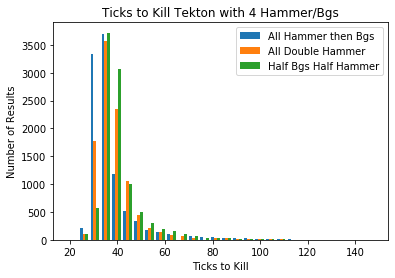

In [54]:
plt.hist(
    [hammer_bgs_results, hammer_hammer_results, mixed_results_1], 
    label=["All Hammer then Bgs", "All Double Hammer", "Half Bgs Half Hammer"], 
    bins=max(hammer_hammer_results) // 5)
plt.xlabel("Ticks to Kill")
plt.ylabel("Number of Results")
plt.title("Ticks to Kill Tekton with 4 Hammer/Bgs")
plt.legend(loc="upper right")
plt.show()

In [57]:
def is_zero_anvil(ticks):
    return ticks <= 55

def print_zero_anvil_percent(results, label):
    zero_anvils = list(filter(is_zero_anvil, results))
    percent = float(len(zero_anvils)) / len(results)
    average = sum(results) / len(results)
    sorted_results = sorted(results)
    median = sorted_results[len(sorted_results) // 2]
    print(f"{label} = {percent * 100}% 0 anvil, average kill = {average} ticks, median kill = {median}")

In [58]:
print_zero_anvil_percent(hammer_bgs_results, "All hammer then bgs")
print_zero_anvil_percent(hammer_hammer_results, "All hammer twice")
print_zero_anvil_percent(mixed_results_1, "Mixed 1")

All hammer then bgs = 94.61% 0 anvil, average kill = 37.1655 ticks, median kill = 35
All hammer twice = 95.30999999999999% 0 anvil, average kill = 38.2275 ticks, median kill = 34
Mixed 1 = 92.58% 0 anvil, average kill = 39.8325 ticks, median kill = 38
